In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\Admin\Documents\Career Foundry\Achievement 6\Data'
df = pd.read_csv(os.path.join(path,'selected_data.csv'))
df.head()

,Unnamed: 0,gini,extreme_poverty_rate,middle_poverty_rate,poverty_gap,polarization,mld,palma_ratio,mean,median,decile_ratio
0,0,0.270103,0.920669,44.618417,0.140051,0.241293,0.119104,0.928335,6.570821,5.774805,5.491588
1,1,0.317390,1.570843,49.669635,0.261761,0.268982,0.164812,1.215056,6.715828,5.539607,7.279801
2,2,0.305957,0.860527,38.545254,0.131325,0.254529,0.154413,1.142718,7.591930,6.460357,6.989495
3,3,0.299847,0.313650,31.110345,0.051241,0.247311,0.148893,1.114657,8.314345,6.957659,6.550821
4,4,0.289605,0.849754,34.528906,0.169101,0.249988,0.138417,1.041193,7.882867,6.825289,6.267023


# Explore my data visually

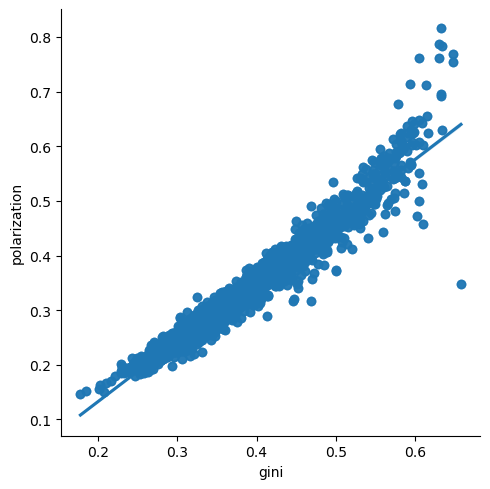

In [3]:
# Create a scatterplot for the "gini" and "middle_poverty_rate" columns in seaborn
f = sns.lmplot(x = 'gini', y = 'polarization', data = df)

# Hypothesis

# Regression

In [4]:
# First, let's see how many NaN values we have in each variable
print("NaN values in Gini:", df['gini'].isna().sum())
print("NaN values in Polarization:", df['polarization'].isna().sum())

# Create a clean dataset by removing rows where either variable is NaN
clean_df = df.dropna(subset=['gini', 'polarization'])

# Now reshape the clean data
X = clean_df['gini'].values.reshape(-1,1)
y = clean_df['polarization'].values.reshape(-1,1)

# Print shapes to verify
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

NaN values in Gini: 476
NaN values in Polarization: 476

Shape of X: (4401, 1)
Shape of y: (4401, 1)


In [5]:
X

array([[0.27010342],
       [0.3173898 ],
       [0.30595656],
       ...,
       [0.43153575],
       [0.44337082],
       [0.50256451]])

In [6]:
y

array([[0.24129327],
       [0.26898164],
       [0.25452866],
       ...,
       [0.38835556],
       [0.41669409],
       [0.46389941]])

In [7]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [9]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions
y_predicted = regression.predict(X_test)

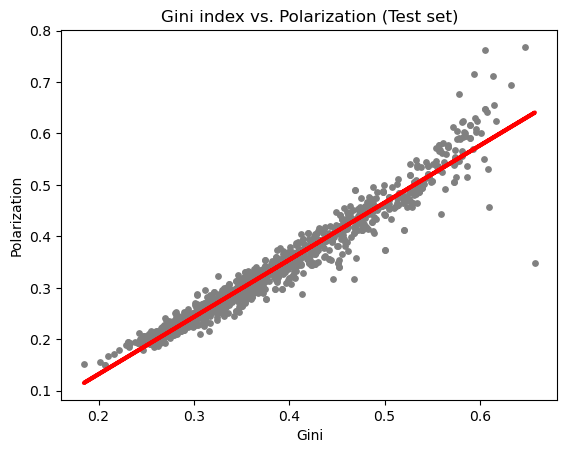

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a scatterplot to show the regression line 
plot = plt
plot.scatter(X_test, y_test, color = 'grey', s=15)
plot.plot(X_test, y_predicted, color = 'red', linewidth=3)
plot.title('Gini index vs. Polarization (Test set)')
plot.xlabel('Gini')
plot.ylabel('Polarization')
plot.show()
plot.savefig(os.path.join(path, 'Images', 'regression_test.png'))

# Interpretation
The polarization index, also known as the Wolfson polarization index, measures the extent to which the distribution of income or expenditure is “spread out” and bi-modal. As we can see from the slope, it is highly correlated with the Gini index, which makes sense, since both are measures of inequality. At a Gini index larger than 0.5, the values seem to be less tightly correlated.
# Model Performance Statistics

In [12]:
mse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
rmse = np.sqrt(mse) # This is the root square mean (same units as the dependent variable 'price')
r2 = r2_score(y_test, y_predicted)

# Print summary stats
print('Model Summary Statistics')
print('Slope:', regression.coef_)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Model Summary Statistics
Slope: [[1.11127879]]
Root mean squared error: 0.023321657561662865
R2 score: 0.947600070993953


# Comparing predicted with actual y values

In [13]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,0.326445,0.332561
1,0.457522,0.497608
2,0.761385,0.582384
3,0.594466,0.559696
4,0.320792,0.338313
5,0.192810,0.180968
6,0.252310,0.295855
7,0.466531,0.451252
8,0.336795,0.353183
9,0.225357,0.231566


# Reflections on Model Performance

As can be seen from comparing the values, the actual and predicted values are quite close to each other. 